# Import necessary libraries

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

# Loading data

In [340]:
netflix_overall = pd.read_csv('/Users/ganhongyue/Library/Mobile Documents/com~apple~CloudDocs/DA_CaseBook/netflix_titles.csv')
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [341]:
netflix_overall.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

# Explore the dataset

## 1. 比较电影和TV show的数量

<AxesSubplot:title={'center':'The Number of Movies and TV shows 2011-2021'}, xlabel='release_year', ylabel='count'>

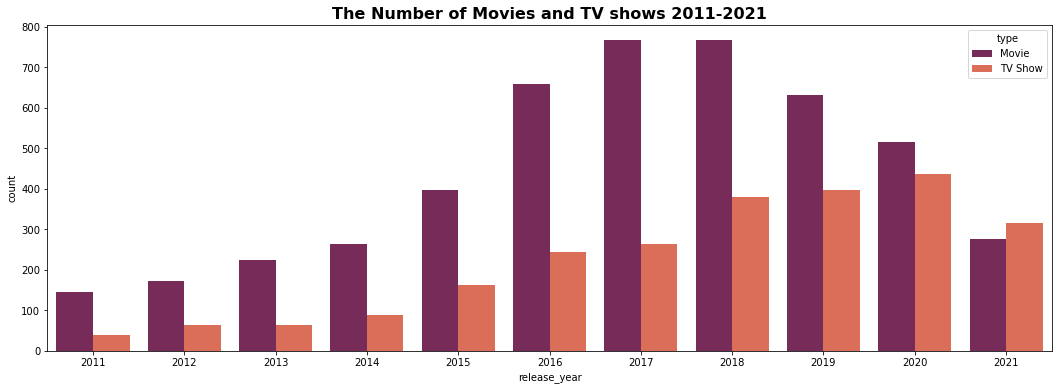

In [342]:
plt.figure(figsize=(18,6))

plt.title('The Number of Movies and TV shows 2011-2021',
          fontsize=16,
          fontweight='bold'
         )

sns.countplot(x='release_year', 
              data=netflix_overall[netflix_overall['release_year']>2010], 
              palette='rocket', 
              hue='type')


## 2. 如果一个制作人想要推出内容，应该在哪个月推出？

### 2.1 数据处理  

* 删除date_added的空值

In [343]:
netflix_date = netflix_overall[['date_added']].dropna()

* 把年、月提取出来

In [344]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(',')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.split(' ')[0])
netflix_date.head()

,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


* 为月份排序，为date_df按照月份-年份分别计数，把na值转换成0

In [345]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
date_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
date_df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
January,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,41.0,72.0,123.0,151.0,204.0,132.0
February,1.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,15.0,81.0,86.0,145.0,114.0,109.0
March,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.0,123.0,170.0,171.0,137.0,112.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,21.0,91.0,114.0,161.0,177.0,188.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0,11.0,85.0,95.0,139.0,157.0,132.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,92.0,77.0,168.0,156.0,207.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,28.0,75.0,150.0,155.0,146.0,257.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0,110.0,163.0,131.0,129.0,178.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,46.0,113.0,123.0,122.0,168.0,183.0


### 2.2 绘图

plt.figure(figsize=(10,6))

sns.heatmap(data=date_df, 
            cmap='afmhot_r'
           )
plt.title('Netflix Contents Released',
          fontsize=22,
          fontweight='bold',
          position=(0,0)
         )

Text(0, 1.0, 'Netfilx Contents Release')

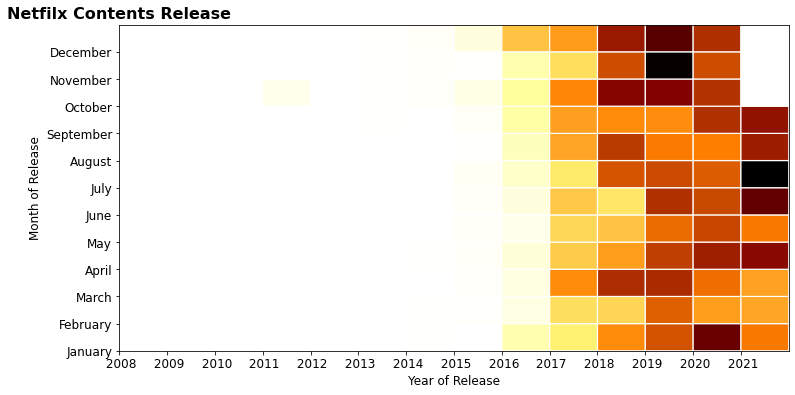

In [346]:
plt.figure(figsize=(12,6))

plt.pcolor(date_df, 
           cmap='afmhot_r', 
           edgecolor='white',
           linewidth=1.2
          )
plt.xticks(np.arange(0,len(date_df.columns),1), date_df.columns, fontsize=12)
plt.yticks(np.arange(0,len(date_df.index),1), date_df.index, fontsize=12)

plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Month of Release', fontsize=12)

plt.title('Netfilx Contents Release', fontweight='bold', fontsize=16, position=(0,0))

根据2019-2021年数据，可以判断在2月、3月、8月、9月的内容推出量较低

## 3. 电影数据分析

### 3.1 电影分级情况

* 把movie的数据和TV show的数据分开

In [347]:
netflix_movie = netflix_overall[netflix_overall['type']=='Movie']
netflix_show = netflix_overall[netflix_overall['type']=='TV Show']

* 绘图，按照rating各类数量降序

<AxesSubplot:xlabel='count', ylabel='rating'>

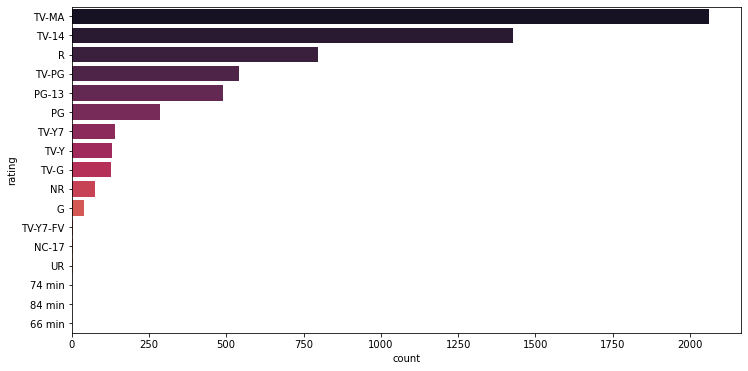

In [261]:
plt.figure(figsize=(12,6))
sns.countplot(data=netflix_movie, 
              y='rating', 
              palette='rocket',
              order=netflix_movie['rating'].value_counts().index)

TOP3分类的是：TV-MA, TV-14和R

### 3.2 按年份的分析

<AxesSubplot:xlabel='release_year', ylabel='count'>

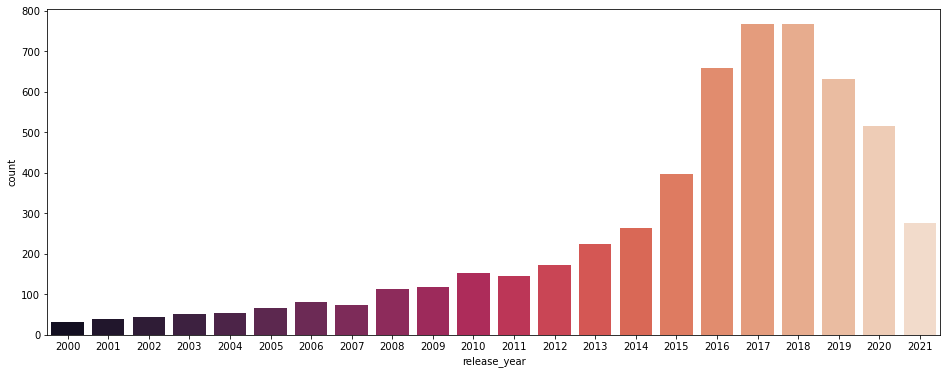

In [262]:
plt.figure(figsize=(16,6))
sns.countplot(x='release_year', 
              palette='rocket',
              data=netflix_movie[netflix_movie['release_year']>=2000])

主要集中在2016到2021，并在2016-2017达到最高，2018之后有下降趋势

### 3.3 按电影推出的国家分析

In [169]:
netflix_movie['country'] = netflix_movie['country'].str.split(',', expand=True)[0]
netflix_movie.head()

/var/folders/d6/71nlzpln21v5d0rxkpr407l40000gn/T/ipykernel_95088/3058707863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movie['country'] = netflix_movie['country'].str.split(',', expand=True)[0]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknow,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,"September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Germany,"September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


<AxesSubplot:xlabel='count', ylabel='country'>

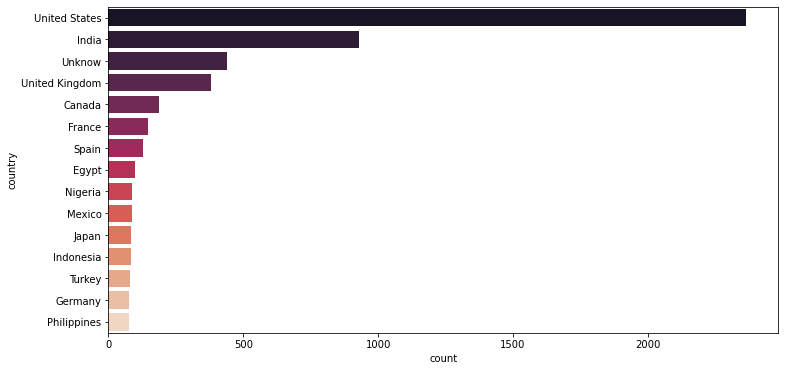

In [263]:
plt.figure(figsize=(12,6))

sns.countplot(y=netflix_movie['country'], 
              data=netflix_movie, 
              palette='rocket',
              order=netflix_movie['country'].value_counts().index[:15])

美国、印度和英国推出的电影数量占据前三，其中美国的数量最高

### 3.4 按电影时长分析

In [219]:
# duration数据内是否有空值
netflix_movie['duration'].isna().sum()

0

In [218]:
# 将控制替换为0
netflix_movie['duration'].fillna(0, inplace=True)
netflix_movie['duration'].isna().sum()

/var/folders/d6/71nlzpln21v5d0rxkpr407l40000gn/T/ipykernel_95088/374220701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movie['duration'].fillna(0, inplace=True)


0

In [221]:
# 将duration数据里面的 min 去掉
netflix_movie['duration'].replace(' min','')

# 把duration数据转换为数据格式
netflix_movie['duration'] = netflix_movie['duration'].astype(str).astype(int)

netflix_movie['duration']

/var/folders/d6/71nlzpln21v5d0rxkpr407l40000gn/T/ipykernel_95088/280659959.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movie['duration'] = netflix_movie['duration'].astype(str).astype(int)


0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int64

In [285]:
plt.figure(figsize=(12,6))

px.histogram(x=netflix_movie['duration'])

<Figure size 864x432 with 0 Axes>

电影时长集中在85-115分钟

### 3.5 词云分析

In [230]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from collections import Counter

In [234]:
# 从数据表内提取listed_in的数据
genres = list(netflix_movie['listed_in'])
gen = []

# 将类型数据提取出来
for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',''))
        
genre = Counter(gen)

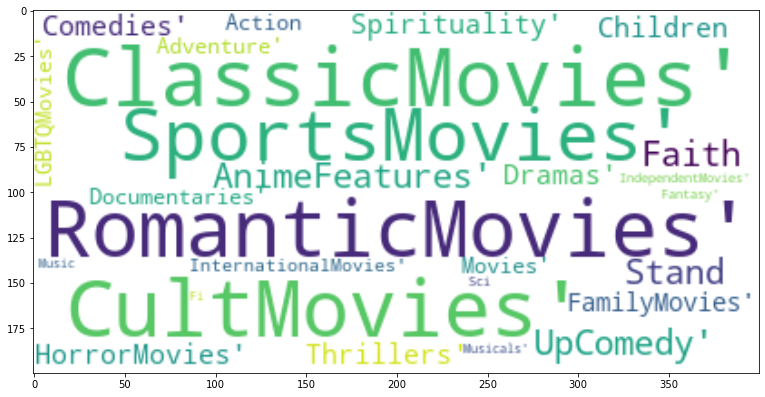

In [235]:
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13,13)

wordcloud = WordCloud(max_words=1000000, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis=('off')
plt.show()

### 3.6 在Netflix推出电影数量最多的10个导演

<AxesSubplot:xlabel='count', ylabel='director'>

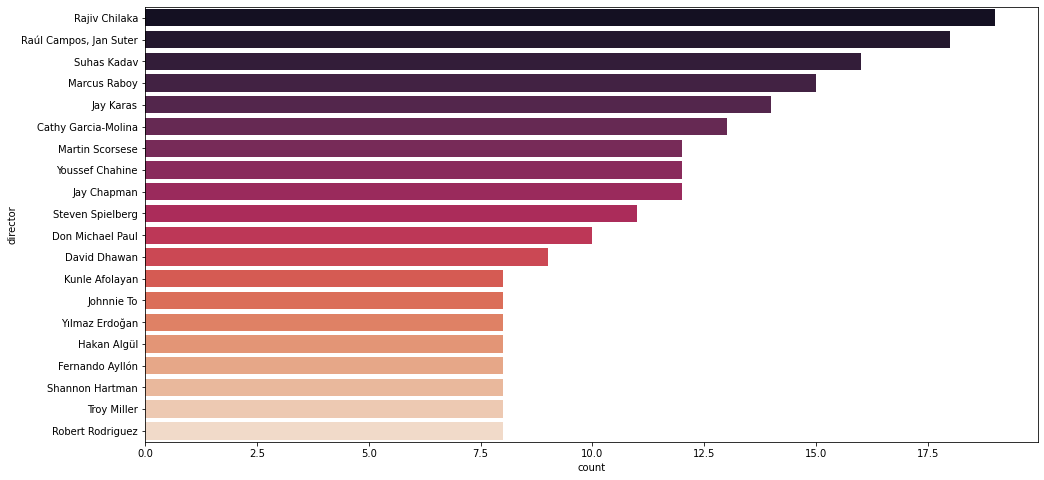

In [267]:
plt.figure(figsize=(16,8))

sns.countplot(y='director', 
              data=netflix_movie, 
              palette='rocket',
              order=netflix_movie['director'].value_counts().index[:20])

### 3.7 参演电影最多的演员

In [379]:
# 创建一个包含所有cast的df，并用split将一部电影里面的多个演员分开
netflix_movie_cast = pd.DataFrame()
netflix_movie_cast['cast'] = netflix_movie['cast'].fillna('Unknown')

netflix_movie_cast = netflix_movie_cast['cast'].str.split(',', expand=True).stack()
netflix_movie_cast = netflix_movie_cast.to_frame()

netflix_movie_cast.columns=['Actor']

netflix_movie_cast



Actor
0    0                 Unknown
6    0         Vanessa Hudgens
     1            Kimiko Glenn
     2           James Marsden
     3            Sofia Carson
...                        ...
8806 3        Manish Chaudhary
     4            Meghna Malik
     5           Malkeet Rauni
     6          Anita Shabdish
     7   Chittaranjan Tripathy

[44950 rows x 1 columns]

In [417]:
top_movie_actor = netflix_movie_cast['Actor'].value_counts()
top_movie_actor = top_movie_actor.to_frame()
top_movie_actor = top_movie_actor.reset_index()
top_movie_actor.columns = ['actor', 'count']

top_movie_actor

plt.figure(figsize=(16,9))
px.bar(data_frame=top_movie_actor.head(15), y='actor', x='count', or )

<Figure size 1152x648 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Actor'>

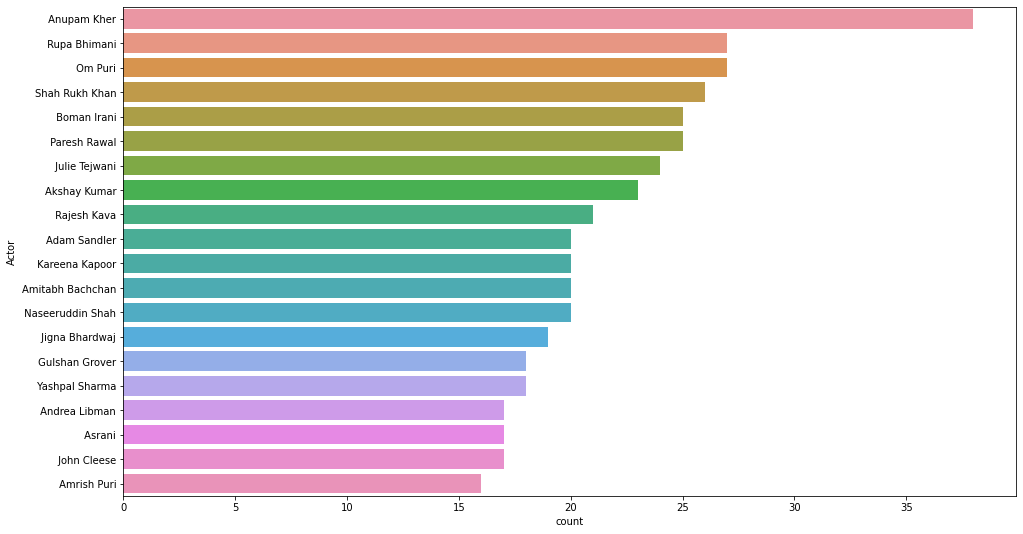

In [392]:
# 绘图，整理出参演电影最多的演员
plt.figure(figsize=(16,9))
sns.countplot(y='Actor', data=netflix_movie_cast, order=netflix_movie_cast['Actor'].value_counts().index[1:21])

## 4. 分析Netflix的电视节目

### 4.1 按照推出国家的分析

In [272]:
# 是否有空值
netflix_show['country'].isnull().sum()

# 提取国家信息
netflix_show['country'] = netflix_show['country'].str.split(',', expand=True)[0]

# 把空值替换为unknown
netflix_show['country'].fillna('Unknown', inplace=True)

/var/folders/d6/71nlzpln21v5d0rxkpr407l40000gn/T/ipykernel_95088/2779367082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_show['country'] = netflix_show['country'].str.split(',', expand=True)[0]
/var/folders/d6/71nlzpln21v5d0rxkpr407l40000gn/T/ipykernel_95088/2779367082.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_show['country'].fillna('Unknown', inplace=True)


<AxesSubplot:xlabel='count', ylabel='country'>

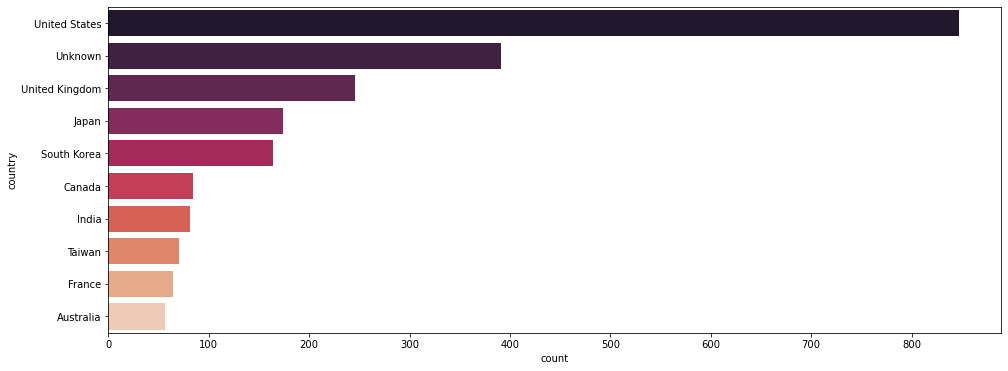

In [276]:
plt.figure(figsize=(16,6))

sns.countplot(y=netflix_show['country'], 
              data=netflix_show, 
              palette='rocket',
              order=netflix_show['country'].value_counts().index[:10]
             )